In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image = mx.image.imread('C:/Users/Khantipu/source/repos/GluonCV/dog_and_cycle.jpg')

In [3]:
print('type:', type(image))
print('shape:', image.shape)
print('datatype:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type: <class 'mxnet.ndarray.ndarray.NDArray'>
shape: (1600, 2560, 3)
datatype: <class 'numpy.uint8'>
minimum value: 0
maximum value: 255


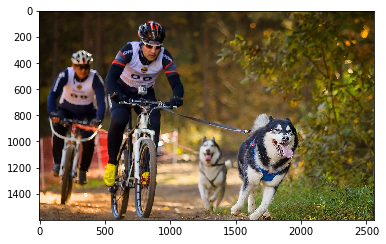

In [4]:
plt.imshow(image.asnumpy())

In [7]:
from mxnet.gluon.data.vision import transforms
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485,.456,.406], [.229,.224,.225])
])

In [8]:
image = transform_fn(image)

In [9]:
print('shape:', image.shape)
print('datatype:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (3, 1600, 2560)
datatype: <class 'numpy.float32'>
minimum value: -2.117904
maximum value: 2.64


In [10]:
image = image.expand_dims(0)
print('shape:', image.shape)

shape: (1, 3, 1600, 2560)


In [11]:
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained = True)

57418KB [02:03, 464.39KB/s]                           


128832KB [06:31, 328.80KB/s]                            


In [12]:
output = network.demo(image)
print(output.shape)

(1, 150, 1600, 2560)


C:\Users\Khantipu\Anaconda3\lib\site-packages\gluoncv\model_zoo\segbase.py:102: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [13]:
output = output[0]
print(output.shape)

(150, 1600, 2560)


In [23]:
px_height, px_width = 600, 250
px_logit = output[:, px_height, px_width]

In [24]:
px_probability = mx.nd.softmax(px_logit)
px_rounded_probability = mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.98 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [25]:
class_index = mx.nd.argmax(px_logit, axis=0)
class_index = class_index[0].astype('int').asscalar()
print(class_index)

12


In [26]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation
class_label = ADE20KSegmentation.CLASSES[class_index]
print(class_label)

person, individual, someone, somebody, mortal, soul


In [27]:
output_probability = mx.nd.softmax(output, axis=0)

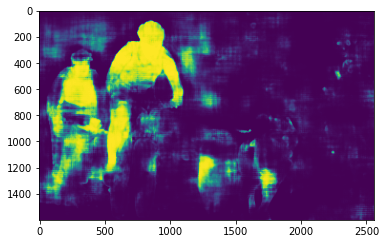

In [28]:
output_heatmap = output_probability[12]
plt.imshow(output_heatmap.asnumpy())

In [29]:
prediction = mx.nd.argmax(output, 0).asnumpy()
print(prediction.shape)

(1600, 2560)


In [30]:
print(prediction)

[[ 0.  0.  0. ...  4.  4.  4.]
 [ 0.  0.  0. ...  4.  4.  4.]
 [ 0.  0.  0. ...  4.  4.  4.]
 ...
 [ 3.  3.  3. ... 17. 17. 17.]
 [ 3.  3.  3. ... 17. 17. 17.]
 [ 3.  3.  3. ... 17. 17. 17.]]


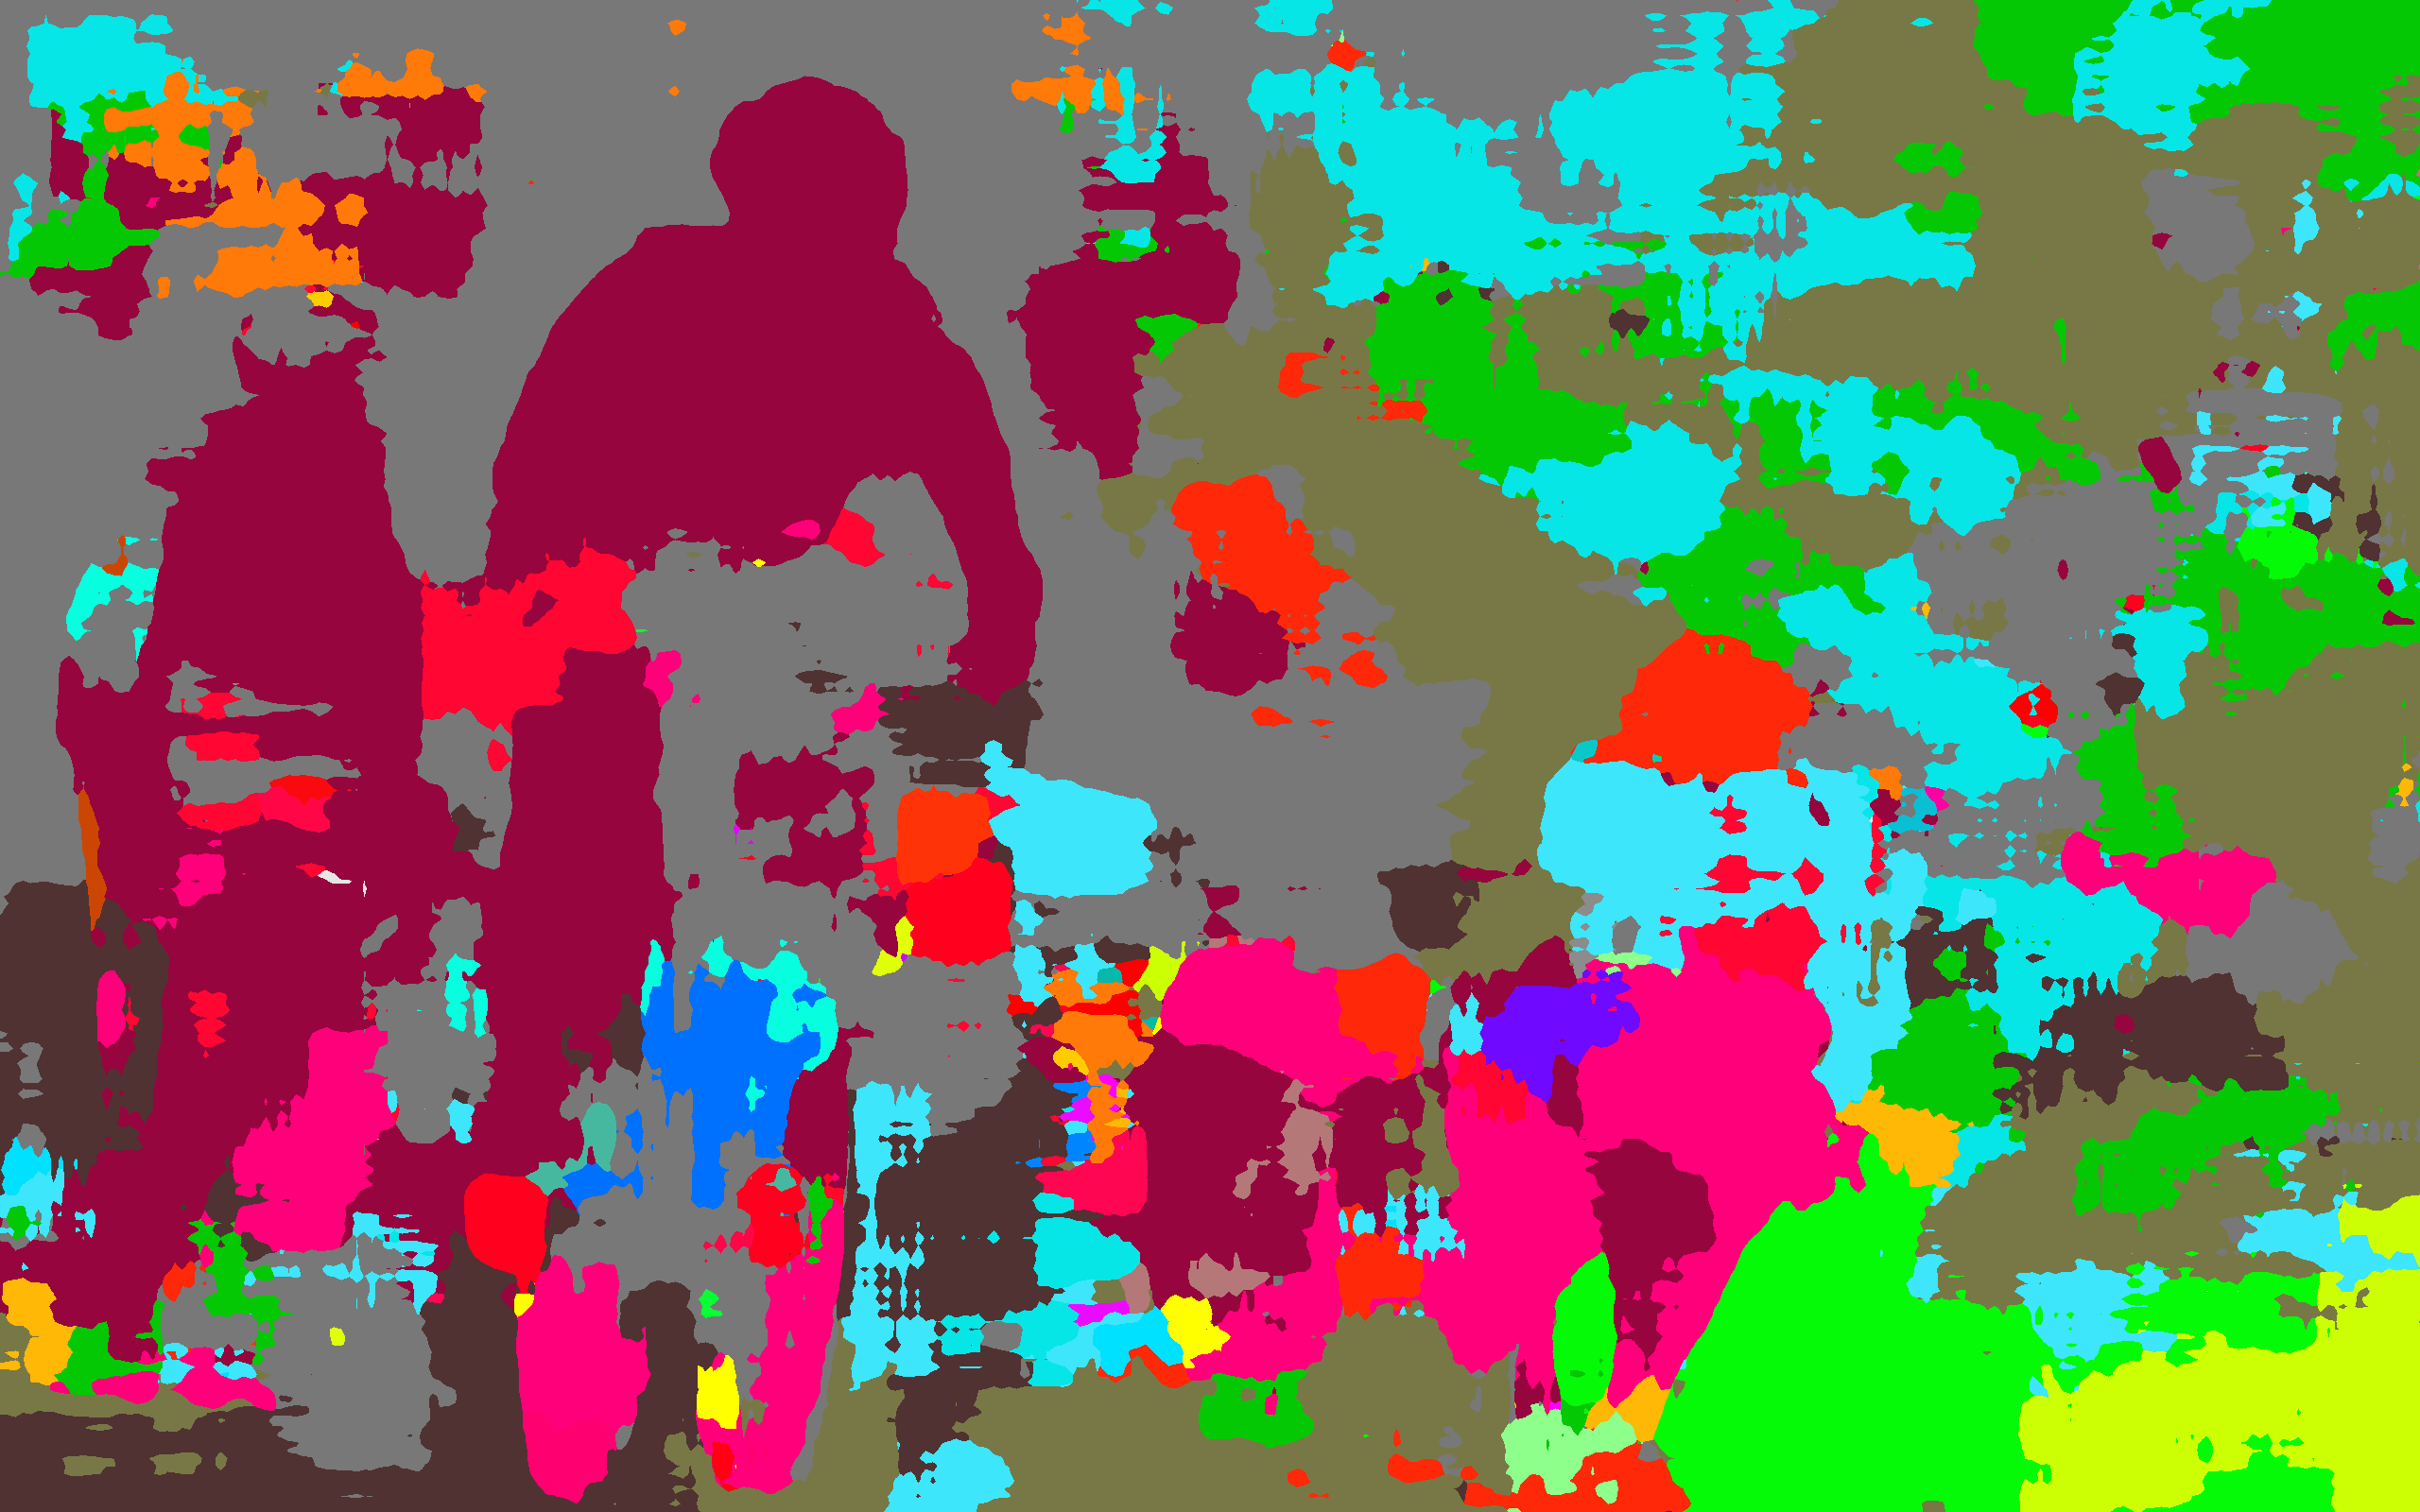

In [33]:
from gluoncv.utils.viz import get_color_pallete
prediction_image = get_color_pallete(prediction, 'ade20k')
prediction_image